In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg


plt.style.use('seaborn')
%matplotlib inline

# 1. The Stock Market Data

In [2]:
smarket = sm.datasets.get_rdataset('Smarket', 'ISLR').data

In [3]:
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [4]:
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [5]:
smarket.shape

(1250, 9)

In [6]:
smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [7]:
smarket['Direction'].value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

In [8]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


<AxesSubplot:xlabel='Year', ylabel='Volume'>

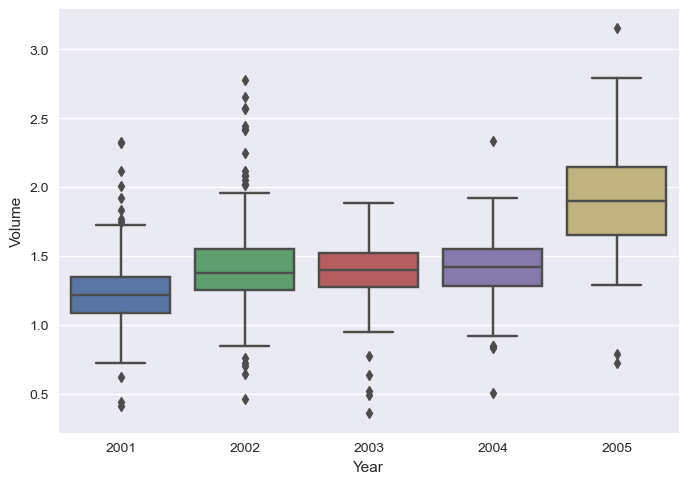

In [9]:
sns.boxplot(x='Year', y='Volume', data=smarket)

# 2. Logistic Regression

In [10]:
label = smarket['Direction']
smarket['Direction'] = smarket['Direction'].map({'Up': 1, 'Down': 0})

In [11]:
result = smf.glm('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',
                data=smarket, family=sm.families.Binomial()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Thu, 06 Oct 2022   Deviance:                       1727.6
Time:                        15:00:27   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002868
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [12]:
result.params

Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

In [13]:
X = smarket.iloc[:, :-1]
prob = result.predict(X)
predicted = pd.DataFrame({'Direction': label, 'Probabilty': prob})
predicted = predicted.assign(
    Predicted = np.where(predicted['Probabilty'] > 0.5, 'Up', 'Down')
)
predicted.head()

,Direction,Probabilty,Predicted
0,Up,0.507084,Up
1,Up,0.481468,Down
2,Down,0.481139,Down
3,Up,0.515222,Up
4,Up,0.510781,Up


In [14]:
pd.crosstab(predicted['Predicted'], predicted['Direction'])

Direction,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [15]:
(507 + 145) / 1250

0.5216

In [16]:
train = smarket['Year'] < 2005

In [17]:
smarket_2005 = smarket[~train]

In [18]:
smarket_2005.shape

(252, 9)

In [19]:
direction_2005 = label[~train]

In [20]:
result = smf.glm('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',
                data=smarket, family=sm.families.Binomial(), subset=train).fit()

In [21]:
X_test = smarket_2005.iloc[:, :-1]
prob = result.predict(X_test)
predicted = pd.DataFrame({'Direction': direction_2005, 'Probabilty': prob})
predicted = predicted.assign(
    Predicted = np.where(predicted['Probabilty'] > 0.5, 'Up', 'Down')
)
predicted.head()

,Direction,Probabilty,Predicted
998,Down,0.528220,Up
999,Down,0.515669,Up
1000,Down,0.522652,Up
1001,Up,0.513854,Up
1002,Down,0.498334,Down


In [22]:
pd.crosstab(predicted['Predicted'], predicted['Direction'])

Direction,Down,Up
Predicted,,
Down,77,97
Up,34,44


In [23]:
(predicted['Direction'] == predicted['Predicted']).mean()

0.4801587301587302

In [24]:
result = smf.glm('Direction ~ Lag1 + Lag2',
                data=smarket, family=sm.families.Binomial(), subset=train).fit()
prob = result.predict(X_test)
predicted = pd.DataFrame({'Direction': direction_2005, 'Probabilty': prob})
predicted = predicted.assign(
    Predicted = np.where(predicted['Probabilty'] > 0.5, 'Up', 'Down')
)
pd.crosstab(predicted['Predicted'], predicted['Direction'])

Direction,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [25]:
(predicted['Direction'] == predicted['Predicted']).mean()

0.5595238095238095

In [26]:
106 / (106 + 76)

0.5824175824175825

In [27]:
result.predict(pd.DataFrame({'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]}))

0    0.479146
1    0.496094
dtype: float64

# 3. Linear Discriminant Analysis

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

In [29]:
X_train = X.loc[train]
y_train = smarket.loc[train, 'Direction']

lda = LinearDiscriminantAnalysis()
lda.fit(X_train[['Lag1', 'Lag2']], y_train)

LinearDiscriminantAnalysis()

In [30]:
lda.priors_

array([0.49198397, 0.50801603])

In [31]:
print('Group means:')
print(lda.means_)

Group means:
[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [32]:
lda.coef_

array([[-0.05544078, -0.0443452 ]])

In [33]:
lda.intercept_

array([0.03221375])

In [34]:
y_test = smarket_2005.iloc[:, -1]
confusion_matrix(y_test, lda.predict(X_test[['Lag1', 'Lag2']]))

array([[ 35,  76],
       [ 35, 106]], dtype=int64)

<AxesSubplot:xlabel='Direction'>

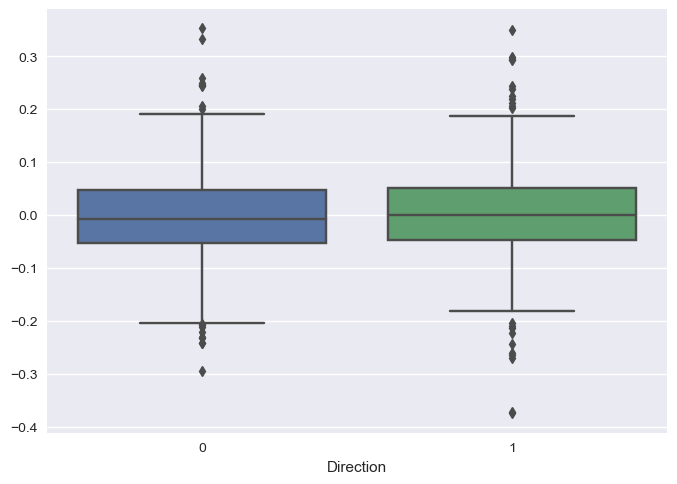

In [35]:
fig, ax = plt.subplots()
sns.boxplot(
    x=y_train,
    y=(X_train['Lag1'] * lda.coef_[0,0] + 
       X_train['Lag2'] * lda.coef_[0,1]), 
    ax=ax
)

(-5.45475, 6.26575, -5.45475, 6.26575)

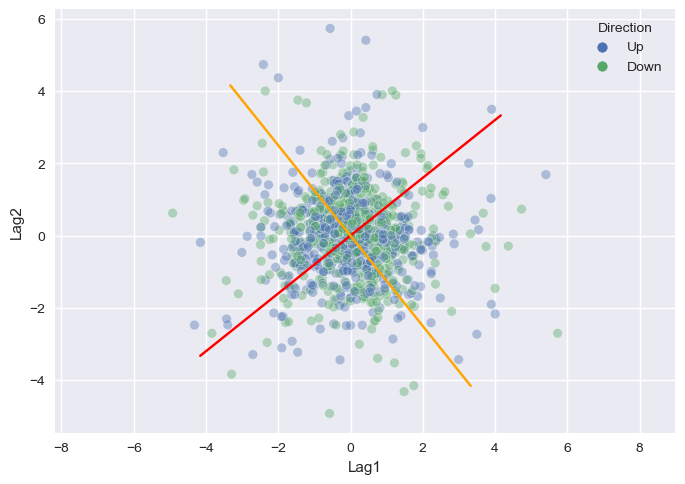

In [36]:
fig, ax = plt.subplots()
sns.scatterplot(x=X_train['Lag1'], y=X_train['Lag2'], 
                hue=label[train], ax=ax, alpha=0.4)
plt.plot([lda.coef_[0, 0]*(-75), lda.coef_[0, 0]*75], [lda.coef_[0, 1]*(-75), lda.coef_[0, 1]*75], c='red')
plt.plot([-lda.coef_[0, 1]*(-75), -lda.coef_[0, 1]*75], [lda.coef_[0, 0]*(-75), lda.coef_[0, 0]*75], c='orange')
plt.axis('equal')

In [37]:
predicted = np.where(lda.predict(X_test[['Lag1', 'Lag2']]) == 1, 'Up', 'Down')
pd.crosstab(predicted, label.loc[~train]).rename_axis(index='Predicted')

Direction,Down,Up
Predicted,,
Down,35,35
Up,76,106


In [38]:
predict_prob = lda.predict_proba(X_test[['Lag1', 'Lag2']])[:, 0]
(predict_prob >= 0.5).sum()

70

In [39]:
(predict_prob < 0.5).sum()

182

In [40]:
(predict_prob > 0.9).sum()

0

# 4. Quadratic Discriminant Analysis

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [42]:
qda = QDA().fit(X_train[['Lag1', 'Lag2']], y_train)

In [43]:
qda.priors_

array([0.49198397, 0.50801603])

In [44]:
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [45]:
predicted = np.where(qda.predict(X_test[['Lag1', 'Lag2']]) == 1, 'Up', 'Down')
pd.crosstab(predicted, label.loc[~train]).rename_axis(index='Predicted')

Direction,Down,Up
Predicted,,
Down,30,20
Up,81,121


In [46]:
qda.score(X_test[['Lag1', 'Lag2']], y_test)

0.5992063492063492

# 5. Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
nb = GaussianNB().fit(X_train[['Lag1', 'Lag2']], y_train)

In [49]:
nb.class_prior_

array([0.49198397, 0.50801603])

In [50]:
nb.theta_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [51]:
nb.var_

array([[1.50355429, 1.53246749],
       [1.51401364, 1.48732877]])

In [52]:
X_train.loc[label[train] == 'Down', 'Lag1'].mean()

0.04279022403258651

In [53]:
X_train.loc[label[train] == 'Down', 'Lag1'].var(ddof=0)

1.5035542920429221

In [54]:
predicted = np.where(nb.predict(X_test[['Lag1', 'Lag2']]) == 1, 'Up', 'Down')
pd.crosstab(predicted, label.loc[~train]).rename_axis(index='Predicted')

Direction,Down,Up
Predicted,,
Down,29,20
Up,82,121


In [55]:
(predicted == label[~train]).mean()

0.5952380952380952

In [56]:
nb.predict_proba(X_test[['Lag1', 'Lag2']])[:5]

array([[0.4873288 , 0.5126712 ],
       [0.47623584, 0.52376416],
       [0.46529531, 0.53470469],
       [0.47484469, 0.52515531],
       [0.49020587, 0.50979413]])

# 6. K-Nearest Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [58]:
knn = KNN(n_neighbors=1).fit(X_train[['Lag1', 'Lag2']], y_train)

In [59]:
predicted = np.where(knn.predict(X_test[['Lag1', 'Lag2']]) == 1, 'Up', 'Down')
pd.crosstab(predicted, label.loc[~train]).rename_axis(index='Predicted')

Direction,Down,Up
Predicted,,
Down,43,58
Up,68,83


In [60]:
(83 + 43) / 252

0.5

In [61]:
knn = KNN(n_neighbors=3).fit(X_train[['Lag1', 'Lag2']], y_train)
predicted = np.where(knn.predict(X_test[['Lag1', 'Lag2']]) == 1, 'Up', 'Down')
pd.crosstab(predicted, label.loc[~train]).rename_axis(index='Predicted')

Direction,Down,Up
Predicted,,
Down,48,55
Up,63,86


In [62]:
(predicted == label[~train]).mean()

0.5317460317460317

In [63]:
caravan = sm.datasets.get_rdataset('Caravan', 'ISLR').data

In [64]:
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [65]:
caravan.shape

(5822, 86)

In [66]:
caravan['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [67]:
348 / 5822

0.05977327378907592

In [68]:
from sklearn.preprocessing import scale

In [69]:
X_standard = scale(caravan.iloc[:, :-1])

In [70]:
caravan.iloc[:, 0].var()

165.0378473951887

In [71]:
caravan.iloc[:, 1].var()

0.16470778193193808

In [72]:
X_standard[:, 0].var()

1.0000000000000002

In [73]:
X_standard[:, 1].var()

1.0

In [74]:
X_train = X_standard[1000:, :]
X_test = X_standard[:1000, :]
y_train = caravan.iloc[1000:, -1]
y_test = caravan.iloc[:1000, -1]

In [75]:
knn = KNN(n_neighbors=1).fit(X_train, y_train)

In [76]:
knn.classes_

array(['No', 'Yes'], dtype=object)

In [77]:
predicted = knn.predict(X_test)

In [78]:
(predicted != y_test).mean()

0.118

In [79]:
('No' != y_test).mean()

0.059

In [80]:
pd.crosstab(predicted, y_test).rename_axis(index='Predicted')

Purchase,No,Yes
Predicted,,
No,873,50
Yes,68,9


In [81]:
9 / (68 + 9)

0.11688311688311688

In [82]:
knn = KNN(n_neighbors=3).fit(X_train, y_train)
predicted = knn.predict(X_test)
pd.crosstab(predicted, y_test).rename_axis(index='Predicted')

Purchase,No,Yes
Predicted,,
No,921,54
Yes,20,5


In [83]:
5 / 25

0.2

In [84]:
knn = KNN(n_neighbors=5).fit(X_train, y_train)
predicted = knn.predict(X_test)
pd.crosstab(predicted, y_test).rename_axis(index='Predicted')

Purchase,No,Yes
Predicted,,
No,931,55
Yes,10,4


In [85]:
4 / 14

0.2857142857142857

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [88]:
probs = model.predict_proba(X_test)

In [89]:
probs

array([[0.90335421, 0.09664579],
       [0.98879794, 0.01120206],
       [0.94459227, 0.05540773],
       ...,
       [0.97903573, 0.02096427],
       [0.83941805, 0.16058195],
       [0.96974299, 0.03025701]])

In [90]:
predicted = pd.Series(['No'] * 1000,name='Predicted')
predicted[probs[:, 1] > 0.5] = 'Yes'
pd.crosstab(predicted, y_test)

Purchase,No,Yes
Predicted,,
No,934,59
Yes,7,0


In [91]:
predicted = pd.Series(['No'] * 1000,name='Predicted')
predicted[probs[:, 1] > 0.25] = 'Yes'
pd.crosstab(predicted, y_test)

Purchase,No,Yes
Predicted,,
No,917,48
Yes,24,11


In [92]:
11 / (11 + 24)

0.3142857142857143

# 7. Poisson Regression

In [93]:
biker = pd.read_csv('data/Bikeshare.csv', index_col=0)
biker.head()

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
1,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0,3,13,16
2,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0,8,32,40
3,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0,5,27,32
4,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0,3,10,13
5,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0,0,1,1


In [94]:
biker.shape

(8645, 15)

In [95]:
biker.columns

Index(['season', 'mnth', 'day', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'bikers'],
      dtype='object')

In [96]:
result = smf.ols(
    'bikers ~ C(mnth, Treatment(reference="Jan")) + C(hr, Treatment(reference=0))'
    '+ workingday + temp + weathersit',
    data=biker).fit()

In [97]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bikers   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     457.3
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:00:33   Log-Likelihood:                -49743.
No. Observations:                8645   AIC:                         9.957e+04
Df Residuals:                    8605   BIC:                         9.985e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                      -68.6317      5.307    -12.932      0.000     -79.035     -58.229
C(mnth, Treatment(reference="Jan"))[T.April]    41.4249      4.972      8.331      0.000      31.678      51.172
C(mnth, Treatment(reference="Jan"))[T.Aug]      53.2430      6.640      8.019      0.000      40.227      66.259
C(mnth, Treatment(reference="Jan"))[T.Dec]      46.4577      4.271     10.878      0.000      38.086      54.829
C(mnth, Treatment(reference="Jan"))[T.Feb]       6.8452      4.287      1.597      0.110      -1.559      15.250
C(mnth, Treatment(reference="Jan"))[T.July]     45.3245      7.081      6.401      0.000      31.444      59.205
C(mnth, Treatment(reference="Jan"))[T.June]     67.8187      6.544     10.364      0.000      54.992      80.646
C(mnth, Treatment(reference="Jan"))[T.March]    16.5514      4.301      3.848      0.000       8.120      24.983
C(mnth, Treatment(reference="Jan"))[T.May]      72.5571      5.641     12.862      0.000      61.499      83.615
C(mnth, Treatment(reference="Jan"))[T.Nov]      60.3100      4.610     13.083      0.000      51.273      69.347
C(mnth, Treatment(reference="Jan"))[T.Oct]      75.8343      4.950     15.319      0.000      66.130      85.538
C(mnth, Treatment(reference="Jan"))[T.Sept]     66.6783      5.925     11.254      0.000      55.064      78.293
C(hr, Treatment(reference=0))[T.1]             -14.5793      5.699     -2.558      0.011     -25.750      -3.408
C(hr, Treatment(reference=0))[T.2]             -21.5791      5.733     -3.764      0.000     -32.817     -10.341
C(hr, Treatment(reference=0))[T.3]             -31.1408      5.778     -5.389      0.000     -42.468     -19.814
C(hr, Treatment(reference=0))[T.4]             -36.9075      5.802     -6.361      0.000     -48.281     -25.534
C(hr, Treatment(reference=0))[T.5]             -24.1355      5.737     -4.207      0.000     -35.381     -12.890
C(hr, Treatment(reference=0))[T.6]              20.5997      5.704      3.612      0.000       9.419      31.781
C(hr, Treatment(reference=0))[T.7]             120.0931      5.693     21.095      0.000     108.934     131.253
C(hr, Treatment(reference=0))[T.8]             223.6619      5.690     39.310      0.000     212.509     234.815
C(hr, Treatment(reference=0))[T.9]             120.5819      5.693     21.182      0.000     109.423     131.741
C(hr, Treatment(reference=0))[T.10]             83.8013      5.705     14.689      0.000      72.618      94.985
C(hr, Treatment(reference=0))[T.11]            105.4234      5.722     18.424      0.000      94.207     116.640
C(hr, Treatment(reference=0))[T.12]            137.2837      5.740     23.916      0.000     126.032     148.536
C(hr, Treatment(reference=0))[T.

In [98]:
from patsy.contrasts import Sum

In [99]:
result2 = smf.ols(
    'bikers ~ C(mnth, Sum("Dec")) + C(hr, Sum(23))'
    '+ workingday + temp + weathersit',
    data=biker).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 bikers   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     457.3
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:00:33   Log-Likelihood:                -49743.
No. Observations:                8645   AIC:                         9.957e+04
Df Residuals:                    8605   BIC:                         9.985e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        73.5974      5.132     14.340      0.000      63.537      83.658
C(mnth, Sum("Dec"))[S.April]     -4.6622      2.741     -1.701      0.089     -10.034       0.710
C(mnth, Sum("Dec"))[S.Aug]        7.1560      3.535      2.024      0.043       0.227      14.085
C(mnth, Sum("Dec"))[S.Feb]      -39.2419      3.539    -11.088      0.000     -46.179     -32.304
C(mnth, Sum("Dec"))[S.Jan]      -46.0871      4.085    -11.281      0.000     -54.096     -38.079
C(mnth, Sum("Dec"))[S.July]      -0.7626      3.908     -0.195      0.845      -8.424       6.899
C(mnth, Sum("Dec"))[S.June]      21.7317      3.465      6.272      0.000      14.939      28.524
C(mnth, Sum("Dec"))[S.March]    -29.5357      3.155     -9.361      0.000     -35.721     -23.351
C(mnth, Sum("Dec"))[S.May]       26.4700      2.851      9.285      0.000      20.882      32.058
C(mnth, Sum("Dec"))[S.Nov]       14.2229      2.860      4.972      0.000       8.616      19.830
C(mnth, Sum("Dec"))[S.Oct]       29.7472      2.700     11.019      0.000      24.455      35.039
C(mnth, Sum("Dec"))[S.Sept]      20.5912      3.046      6.761      0.000      14.621      26.561
C(hr, Sum(23))[S.0]             -96.1420      3.955    -24.307      0.000    -103.895     -88.389
C(hr, Sum(23))[S.1]            -110.7213      3.966    -27.916      0.000    -118.496    -102.947
C(hr, Sum(23))[S.2]            -117.7212      4.016    -29.310      0.000    -125.594    -109.848
C(hr, Sum(23))[S.3]            -127.2828      4.081    -31.191      0.000    -135.282    -119.283
C(hr, Sum(23))[S.4]            -133.0495      4.117    -32.319      0.000    -141.119    -124.980
C(hr, Sum(23))[S.5]            -120.2775      4.037    -29.794      0.000    -128.191    -112.364
C(hr, Sum(23))[S.6]             -75.5424      3.992    -18.925      0.000     -83.367     -67.718
C(hr, Sum(23))[S.7]              23.9511      3.969      6.035      0.000      16.172      31.730
C(hr, Sum(23))[S.8]             127.5199      3.950     32.284      0.000     119.777     135.263
C(hr, Sum(23))[S.9]              24.4399      3.936      6.209      0.000      16.724      32.155
C(hr, Sum(23))[S.10]            -12.3407      3.936     -3.135      0.002     -20.056      -4.625
C(hr, Sum(23))[S.11]              9.2814      3.945      2.353      0.019       1.549      17.014
C(hr, Sum(23))[S.12]             41.1417      3.957     10.397      0.000      33.385      48.899
C(hr, Sum(23))[S.13]             39.8939      3.975     10.036      0.000      32.102      47.686
C(hr, Sum(23))[S.14]             30.4940      3.991      7.641      0.000      22.671      38.317
C(hr, Sum(23))[S.15]             35.9445      3.995      8.998      0.000      28.114      43.775
C(hr, Sum(23))[S.16]             82.3786     

In [100]:
((result.fittedvalues - result2.fittedvalues)**2).sum()

3.815363357639102e-20

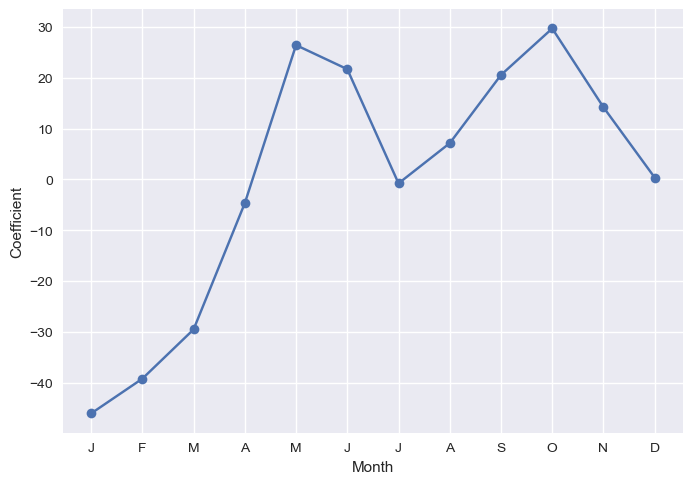

In [101]:
month_coefs = result2.params.iloc[[4, 3, 7, 1, 8, 6, 5, 2, 11, 10, 9]]
month_coefs.index= ['Jan', 'Feb', 'March', 'April', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov']
month_coefs['Dec'] = -month_coefs.sum()

fig, ax = plt.subplots()
ax.plot(month_coefs, '-o')
ax.set(xlabel='Month', ylabel='Coefficient')
ax.set_xticks(range(0,12), ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

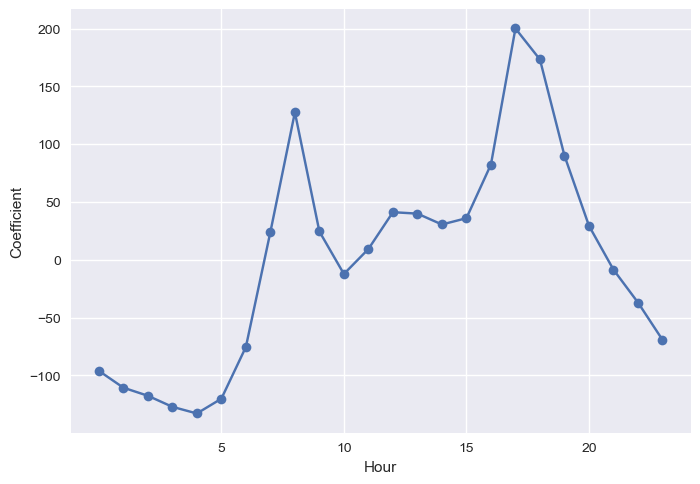

In [102]:
hours_coefs = result2.params.iloc[12:35].reset_index(drop=True)
hours_coefs[23] = - hours_coefs.sum()

fig, ax = plt.subplots()
ax.plot(hours_coefs, '-o')
ax.set(xlabel='Hour', ylabel='Coefficient')
ax.set_xticks([5, 10, 15, 20], [5, 10, 15, 20])

In [103]:
result = smf.glm('bikers ~ C(mnth, Sum("Dec")) + C(hr, Sum(23))' 
                 '+ workingday + temp + weathersit',
                 data=biker, family=sm.families.Poisson()).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 bikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8605
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4054e+05
Date:                Thu, 06 Oct 2022   Deviance:                   2.2804e+05
Time:                        15:00:34   Pearson chi2:                 2.20e+05
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         4.1182      0.006    683.963      0.000       4.106       4.130
C(mnth, Sum("Dec"))[S.April]      0.0215      0.003      6.888      0.000       0.015       0.028
C(mnth, Sum("Dec"))[S.Aug]        0.1512      0.004     41.281      0.000       0.144       0.158
C(mnth, Sum("Dec"))[S.Feb]       -0.4441      0.005    -91.379      0.000      -0.454      -0.435
C(mnth, Sum("Dec"))[S.Jan]       -0.6702      0.006   -113.445      0.000      -0.682      -0.659
C(mnth, Sum("Dec"))[S.July]       0.1036      0.004     25.121      0.000       0.096       0.112
C(mnth, Sum("Dec"))[S.June]       0.2232      0.004     62.818      0.000       0.216       0.230
C(mnth, Sum("Dec"))[S.March]     -0.2937      0.004    -70.886      0.000      -0.302      -0.286
C(mnth, Sum("Dec"))[S.May]        0.2405      0.003     82.462      0.000       0.235       0.246
C(mnth, Sum("Dec"))[S.Nov]        0.1503      0.003     47.248      0.000       0.144       0.156
C(mnth, Sum("Dec"))[S.Oct]        0.2676      0.003     96.091      0.000       0.262       0.273
C(mnth, Sum("Dec"))[S.Sept]       0.2335      0.003     75.281      0.000       0.227       0.240
C(hr, Sum(23))[S.0]              -0.7544      0.008    -95.744      0.000      -0.770      -0.739
C(hr, Sum(23))[S.1]              -1.2260      0.010   -123.173      0.000      -1.245      -1.206
C(hr, Sum(23))[S.2]              -1.5631      0.012   -131.702      0.000      -1.586      -1.540
C(hr, Sum(23))[S.3]              -2.1983      0.016   -133.846      0.000      -2.230      -2.166
C(hr, Sum(23))[S.4]              -2.8305      0.023   -125.586      0.000      -2.875      -2.786
C(hr, Sum(23))[S.5]              -1.8147      0.013   -134.775      0.000      -1.841      -1.788
C(hr, Sum(23))[S.6]              -0.4299      0.007    -62.341      0.000      -0.443      -0.416
C(hr, Sum(23))[S.7]               0.5752      0.004    130.544      0.000       0.567       0.584
C(hr, Sum(23))[S.8]               1.0769      0.004    302.220      0.000       1.070       1.084
C(hr, Sum(23))[S.9]               0.5818      0.004    135.727      0.000       0.573       0.590
C(hr, Sum(23))[S.10]              0.3369      0.005     71.372      0.000       0.328       0.346
C(hr, Sum(23))[S.11]              0.4941      0.004    112.494      0.000       0.486       0.503
C(hr, Sum(23))[S.12]              0.6796      0.004    167.040      0.000       0.672       0.688
C(hr, Sum(23))[S.13]              0.6736      0.004    164.722      0.000       0.666       0.682
C(hr, Sum(23))[S.14]              0.6249      0.004    149.570      0.000       0.617       0.633
C(hr, Sum(23))[S.15]              0.6538      0.004    158.205      0.000       0.646       0.662
C(hr, Sum(23))[S.16]              0.8743     

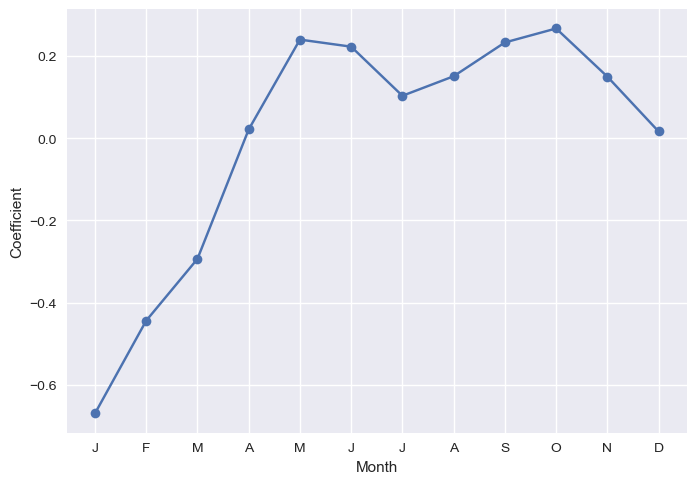

In [104]:
month_coefs = result.params.iloc[[4, 3, 7, 1, 8, 6, 5, 2, 11, 10, 9]]
month_coefs.index= ['Jan', 'Feb', 'March', 'April', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov']
month_coefs['Dec'] = -month_coefs.sum()

fig, ax = plt.subplots()
ax.plot(month_coefs, '-o')
ax.set(xlabel='Month', ylabel='Coefficient')
ax.set_xticks(range(0,12), ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

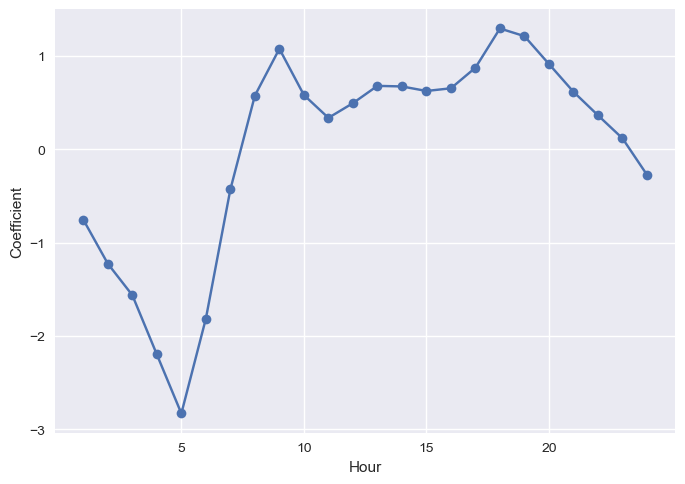

In [105]:
hours_coefs = result.params.iloc[12:35].reset_index(drop=True)
hours_coefs[23] = - hours_coefs.sum()

fig, ax = plt.subplots()
ax.plot(hours_coefs, '-o')
ax.set(xlabel='Hour', ylabel='Coefficient')
ax.set_xticks([4, 9, 14, 19], [5, 10, 15, 20])

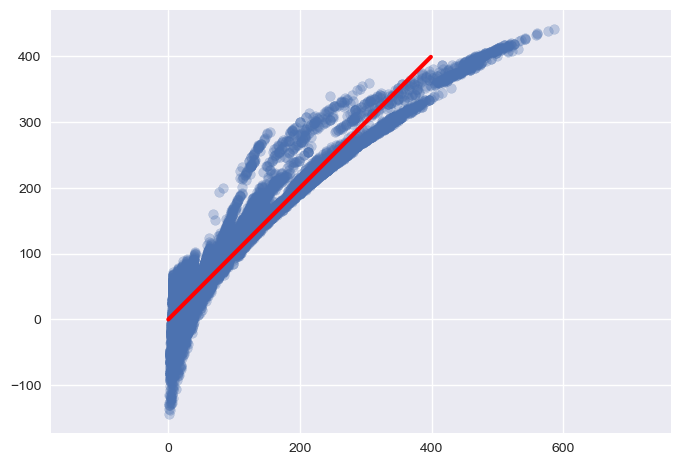

In [106]:
fig, ax = plt.subplots()
ax.scatter(result.fittedvalues, result2.fittedvalues, alpha=0.3)
plt.axis('equal')
plt.plot(range(400), range(400), color='red', lw=3)